# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_test_orig, y_test = test['features'], test['labels']


In [2]:
# load the text labels for the traffic signs
import csv
signnames = {}
with open('signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        signnames[int(row['ClassId'])] = row['SignName']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train_orig.shape[0]

# TODO: Number of testing examples.
n_test = X_test_orig.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_orig.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train_orig.max() + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

<center><b>Fig. 1: Annotated example images from the training set.</center></b>

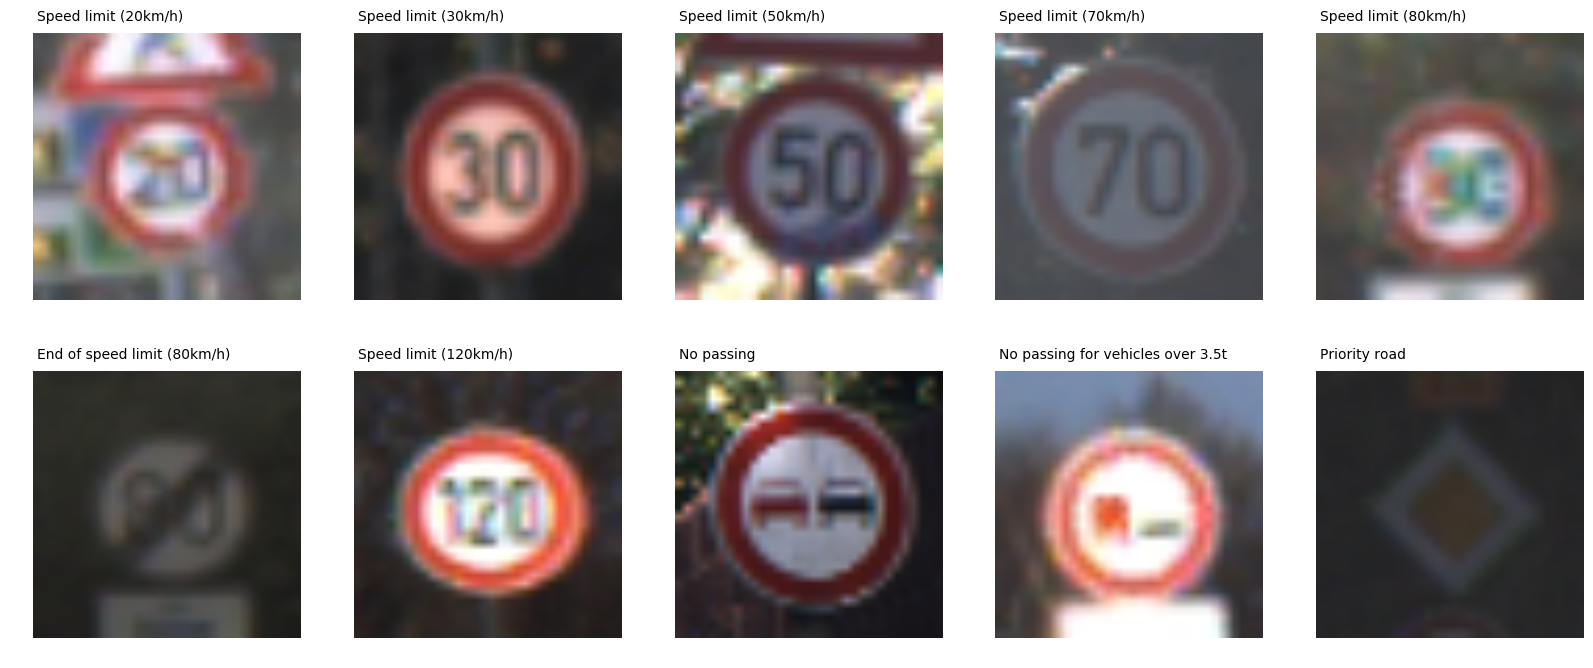

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random
import IPython.display as display
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_images(img_data, labels, columns=8, rows=2, type=None, offset=1):
    f, axarr = plt.subplots(nrows=rows, ncols=columns, figsize=(20,4*rows),squeeze=False)
    cmap = None if len(img_data.shape) == 4 else 'gray' 
    for axis, i in zip(axarr.reshape((columns*rows,)), np.array(range(0,rows*columns))*offset):
        index = i%img_data.shape[0]
        img = img_data[index]
        if type == 'yuv':
            img = cv2.cvtColor(img, cv2.COLOR_YUV2RGB)
    
        axis.axis('off')
        axis.imshow(img, cmap=cmap)
        axis.text(0,-2, signnames[labels[index]])
        
def caption(number, text):
    display.display(display.Markdown("<center><b>Fig. {}: {}</center></b>".format(number, text)))
    
plot_images(X_train_orig,y_train_orig, rows=2,columns=5,offset=2048)
caption(1, "Annotated example images from the training set.")

<center><b>Fig. 2: Histogram of the class distribution in the training set.</center></b>

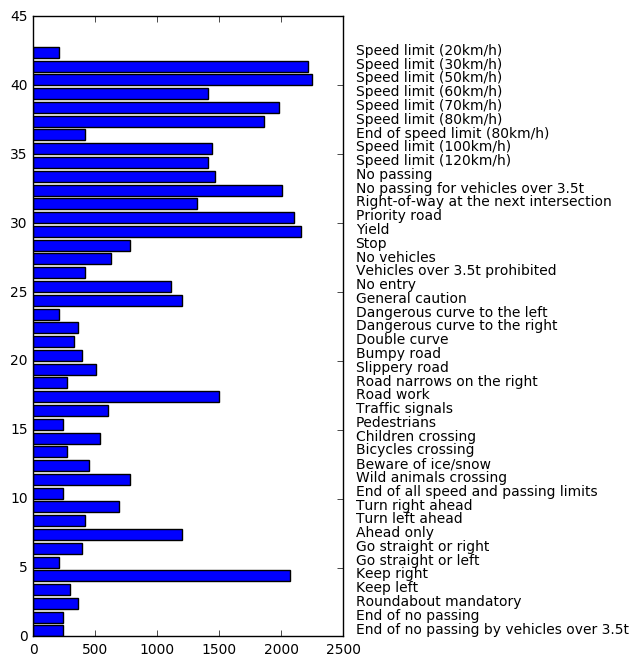

In [5]:
# Plotting the histogram of the classes in the test data set.
%matplotlib inline
plt.figure(figsize=(4,8))
h,_ = np.histogram(y_train_orig, bins=n_classes)
x = range(0,n_classes)
ind = np.arange(n_classes)
plt.barh(ind[::-1],h)
ax = plt.gca()

for j in range(n_classes):
     ax.text(2600, j + 0.25, signnames[n_classes - j - 1])

caption(2, "Histogram of the class distribution in the training set.")




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

<center><b>Fig. 3: Preprocessed images from the training set.</center></b>

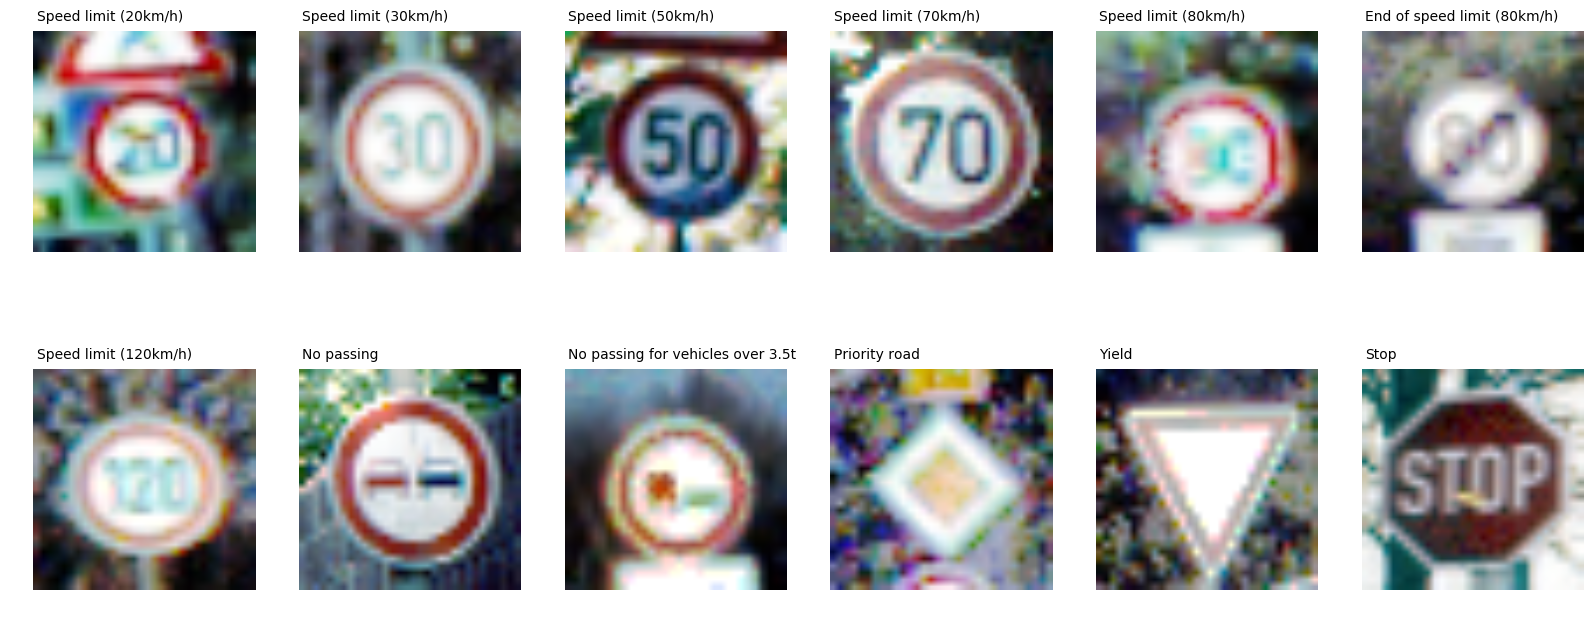

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import cv2

def normalize(X):
    X = X / 255.0
    return X


def equalize_channel(X,c):
    channel = X[:,:,c]
    channel = channel.astype(np.uint8)
    channel = cv2.equalizeHist(channel)
    X[:,:,c] = channel

    
def equalize(X):
    for i in range(0,3):
        equalize_channel(X,i)
    return X
        

def preprocess(X):
    result = []
    for i in range(0,X.shape[0]):
        img = np.array(X[i,:,:,:])
        equalize(img)
        img = normalize(img)
        result.append(img)
    
    return np.array(result)


# X_train_preprocessed is used here for visualization only. The training examples are 
# preprocessed online during training/augmentation.
X_train_preprocessed = preprocess(X_train_orig)
assert X_train_preprocessed.shape == X_train_orig.shape

# X_test is preprocessed, as there is no further processing is done on the test data.
X_test = preprocess(X_test_orig)

plot_images(X_train_preprocessed, y_train_orig, type='rgb',rows=2,columns=6,offset=2048)
caption(3, "Preprocessed images from the training set.")

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

#### Answer:
A histogram equalization [[1]](https://en.wikipedia.org/wiki/Histogram_equalization) is performed on the three color channels (RGB) and the pixel values are then  (Y) in order to improve contrast and accentuate edges.
All color channels are then divided by 255.0 in order to ensure that all samples lie in the range (0.0, 1.0) which helps prevent saturation of neurons in the convolutional neural network. I also tried normalizing to the range (0.1,0.9) but did not find a significant effect on accuracy of the classification. Note that the tensor X_test is not preprocessed at this point and no additional data is generated here. The training data is augmented/preprocessed online inside the training loop.

<center><b>Fig. 4: Examples of images augmented for training.</center></b>

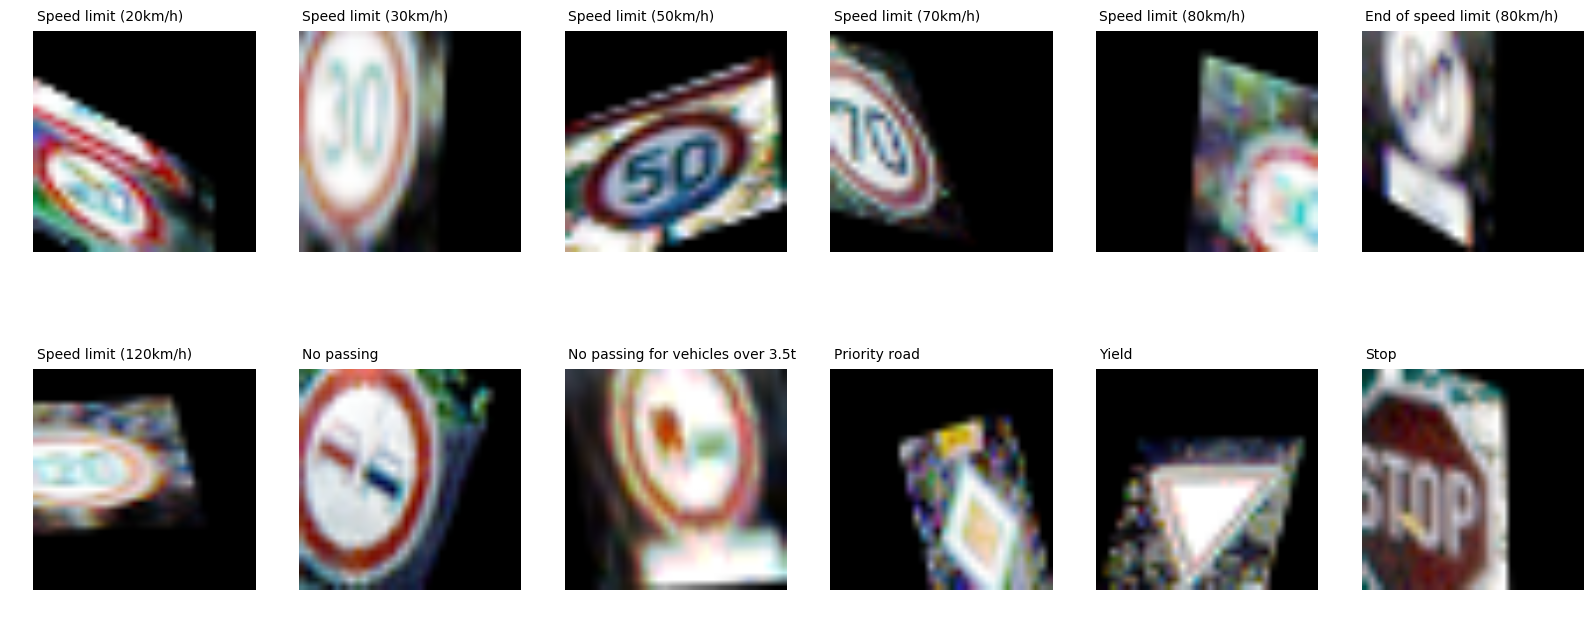

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def translation_matrix(dx, dy):
    return np.float32([[1,0,dx],[0,1,dy], [0,0,1]])


def rotation_matrix(center, theta, scale):
    result = np.zeros((3,3))
    result[0:2,:] = cv2.getRotationMatrix2D(center, theta, scale)
    result[2,:] = [0,0,1]
    return result


def random_offset(amp):
    return np.random.uniform(-amp, amp, 2)


def skew_matrix(size):
    p1 = np.float32([0,0])
    p2 = np.float32([0,size[0]])
    p3 = np.float32(size)
    pts1 = np.float32([p1,p2,p3])

    delta = size[0] * 0.25
    p1 += random_offset(delta)
    p2 += random_offset(delta)
    p3 += random_offset(delta)
    pts2 = np.float32([p1,p2,p3])

    result = np.zeros((3,3))
    result[0:2,:] = cv2.getAffineTransform(pts1,pts2)
    result[2,:] = [0,0,1]
    return result

    
def jitter_image(img):
    w = img.shape[0]
    h = img.shape[1]

    equalize(img)
    
    max_theta = 45.0 / 4
    min_scale = 0.8
    max_scale = 1.2
    scale = random.uniform(min_scale, max_scale)
    theta = random.gauss(0.0, max_theta)
    R = rotation_matrix((w/2, h/2), theta, scale)
    S = skew_matrix((w,h))
    
    max_delta = 8
    dx = random.randint(-max_delta,max_delta)
    dy = random.randint(-max_delta,max_delta)    
    T = translation_matrix(dx,dy)

    M = np.dot(S,R)
    M = np.dot(T,M)
    M = M[0:2,:]
    img = cv2.warpAffine(img, M, (w,h), flags=cv2.INTER_CUBIC)
    
    img = normalize(img)
    return img
    
    
def jitter_data(X):
    result = []
    for i in range(0,X.shape[0]):
        img = np.array(X[i,:,:,:]).reshape((32,32,3))
        img = jitter_image(img)
        result.append(img)
        
    return np.array(result).reshape((-1,32,32,3))

# Prepare some data for visualization:
jittered_data = jitter_data(X_train_orig).reshape((-1,32,32,3))
plot_images((jittered_data * 255.0).astype(np.uint8), y_train_orig, type='rgb', rows=2,columns=6,offset=2048)
caption(4, "Examples of images augmented for training.")

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_orig, y_train_orig, test_size=0.2)
X_validation = preprocess(X_validation)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

#### Answer:
* The training data set is split randomly into a traing set and a validation set of proportions 80/20, respectively.
* The training data is augmented online during training with the following steps: every image is rotated by a random amount, is then skewed by a random affine transform and lastly translated by a random amount. 

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
import tensorflow.contrib.layers 

BATCH_SIZE = 128
keep_factors = []
sigma = 0.1
var_count = 0

def get_var_name():
    global var_count
    result = "VAR_{}".format(var_count)
    var_count+=1
    return result


def reset_var_names():
    global var_count
    var_count = 0


def get_shape(m):
    return m.get_shape().as_list()


def conv(m, depth, filter_size=3):
    current_shape = get_shape(m)
    filter_shape = [filter_size, filter_size, current_shape[3], depth]
    w = tf.Variable(tf.truncated_normal(filter_shape, mean=0, stddev=sigma),name=get_var_name())
    b = tf.Variable(tf.zeros(depth),name=get_var_name())
    m = tf.nn.conv2d(m, filter=w, strides=[1,1,1,1], padding='SAME') + b
    m = tf.nn.relu(m)
    return m


def maxpool(m):
    current_shape = get_shape(m)
    m = tf.nn.max_pool(m, [1,2,2,1], [1,2,2,1], padding='VALID')
    return m


def flatten(m):
    m = tensorflow.contrib.layers.flatten(m)
    return m


def flatten_and_combine(*args):
    num_parms = 0
    values = []
    for m in args:
        values.append(flatten(m))
    return tf.concat(1, values)
    

def dense(m, output_size):
    current_shape = get_shape(m)
    assert len(current_shape) == 2
    w_shape = [int(current_shape[1]),output_size]
    w = tf.Variable(tf.truncated_normal(w_shape, mean=0, stddev=sigma),name=get_var_name())
    b = tf.Variable(tf.zeros(output_size),name=get_var_name())
    m = tf.add(tf.matmul(m, w), b)
    return m


def relu(m):
    return tf.nn.relu(m)


def dropout(m, keep_factor):
    keep_factor_placeholder = tf.placeholder(tf.float32, shape=[])
    keep_factors.append((keep_factor_placeholder, keep_factor))
    return tf.nn.dropout(m, keep_factor_placeholder)
    

def set_keep_factors_training(dict):
    for key,value in keep_factors:
        dict[key] = value

        
def set_keep_factors_evaluation(dict):
    for key,value in keep_factors:
        dict[key] = 1.0
        
        
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
lr = tf.placeholder(tf.float32, shape=[])


def Net(x):
    global keep_factors
    keep_factors = []
    reset_var_names()
    m1 = conv(x, 3, 1)
    m1 = conv(m1, 32, 3)
    m1 = conv(m1, 32, 3)
    m1 = maxpool(m1)
    m2 = conv(m1, 64, 3)
    m2 = conv(m2, 64, 3)
    m2 = maxpool(m2)
    m3 = conv(m2, 128, 3)
    m3 = conv(m3, 128, 3)
    m3 = maxpool(m3)
    m = flatten_and_combine(m1,m2,m3)
    m = dense(m, 1024)
    m = relu(m)
    m = dropout(m, 0.50)
    m = dense(m, 1024)
    m = relu(m)
    m = dropout(m, 0.50)
    logits = dense(m, n_classes)
    return logits
        

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


#### Answer:
My final model is a convolutional neural network with seven convolutional and three fully connected (dense) layers. The first convolutional layer has a filter size of 1x1 and a depth of 3 and enables the network to find an optimal color space transformation for the problem. I also tried to explicitly convert the images into YUV color space and equalizing the Y channel but this resulted in a slightly lower accuracy.

The following convolutional layers are alternated with pooling layers with a pooling size of 2x2 and increase in depth for deeper layers from 32 to 128 filters.

For all layers, rectified linear units (ReLUs) are used as activation functions. The outputs of the pooling layers are combined into an input tensor that is fed into the fully connected layers with 1024 neurons each. Concatenating the outputs of the maxpool layers enables the network to use features of different resolutions for classification. In order to improve the robustness of the network, dropout with a keep probability of 0.5 is used on the fully connected layers.

The output layer is a fully connected layer with 43 output neurons, which corresponds to the number of different classes in the dataset. Finally, the outputs of the last layers are fed into a softmax function in order to calculate the probabilities for each class. The resulting topology is shown below:

<img src="fig/Convnet2.png">
<center><b>Fig. 5: Final convolutional neural network architechture for classifying traffic signs.</b></center>



In [10]:
rate = 0.001

logits = Net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        feed_dict = {x: batch_x, y: batch_y}
        set_keep_factors_evaluation(feed_dict)
        accuracy, loss = sess.run((accuracy_operation, loss_operation), feed_dict=feed_dict)
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))

    return total_accuracy / num_examples, total_loss / num_examples


## Please Note:
The next cell will train the model which takes approx. 60min on a GTX 1080 GPU.

In [37]:
# Training
from sklearn.utils import shuffle
import sys
import uuid
import time

MAX_EPOCHS = 1000
save_path = "./models/final_model" 
%matplotlib inline

def plot_learning_curves(learning_vector):
    f, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
    ax[0].plot(learning_vector[:,0], label="tr. acc.")
    ax[0].plot(learning_vector[:,2], label="val. acc.")
    ax[0].legend(loc="lower right")
    ax[1].plot(learning_vector[:,1], label="tr. loss.")
    ax[1].plot(learning_vector[:,3], label="val. loss.")
    ax[1].legend()
    ax[2].plot(learning_vector[:,4], label="learning rate")
    ax[2].legend()
    ax[2].set_yscale('log')
    ax[2].legend(loc="lower left")

EPOCH   Train. Acc.   Train. Loss   Val. Acc.    Val. Loss    LR
285     0.99095       0.030205      0.99936      0.005095     1.220703125e-07   Reducing learning rate to 6.103515625e-08
Model does not improve anymore. Stopping.


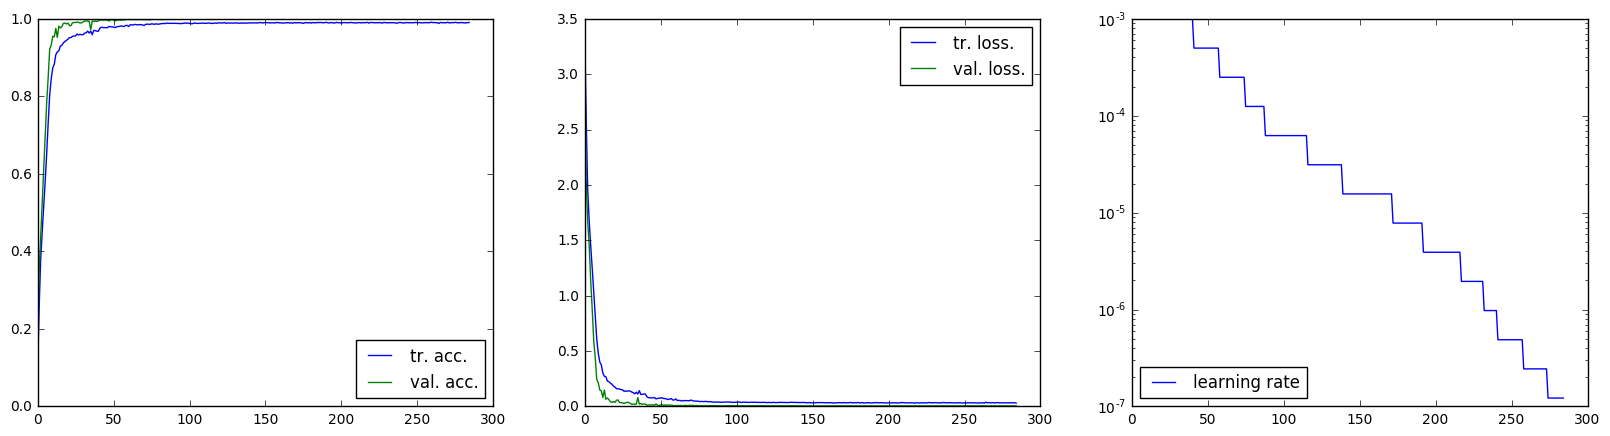

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    current_loss = 1e9
    num_non_improved = 0
    learning_rate = 0.001
    saver = tf.train.Saver()
    did_save_model = False
    learning_data = []
    start_time = time.time()
    
    print("Training model...")

    print()
    for i in range(MAX_EPOCHS):
        training_loss = 0.0
        training_accuracy = 0.0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x = jitter_data(batch_x)
            feed_dict = {x:batch_x, y:batch_y, lr:learning_rate}
            set_keep_factors_training(feed_dict)
            sess.run(training_operation, feed_dict=feed_dict)
            set_keep_factors_evaluation(feed_dict)
            accuracy, loss = sess.run((accuracy_operation, loss_operation), feed_dict=feed_dict)
            training_accuracy += (accuracy * len(batch_x))
            training_loss += (loss * len(batch_x))

        training_accuracy /= X_train.shape[0]
        training_loss /= X_train.shape[0]
        validation_accuracy, validation_loss = evaluate(X_validation, y_validation)
    
        learning_data.append((training_accuracy, training_loss, validation_accuracy, validation_loss, learning_rate))
        learning_vector = np.array(learning_data)

        display.clear_output(wait=True)
        print("EPOCH   Train. Acc.   Train. Loss   Val. Acc.    Val. Loss    LR")
        print("{:3d}     {:.5f}       {:.6f}      {:.5f}      {:.6f}     {}".format(i+1, training_accuracy, training_loss, validation_accuracy, validation_loss, learning_rate), end="")

        if validation_loss - current_loss < -1e-6:
            current_loss = validation_loss
            num_non_improved = 0
            if validation_loss < 0.25:
                print("   Saving model.",end="")
                saver.save(sess, save_path)
                did_save_model = True
        else:
            num_non_improved += 1
            
        if num_non_improved > 8:
            learning_rate = learning_rate / 2
            current_loss = validation_loss
            print("   Reducing learning rate to {}".format(learning_rate), end="")
            num_non_improved = 0

        print("")    
        
        if learning_rate <= 1.05e-7:
            print("Model does not improve anymore. Stopping.")
            break
    
    if did_save_model == False:
        print("Saving model.")
        saver.save(sess, save_path)
        
    end_time = time.time()

print("Trained for {} epochs in {:.0f}s".format(i,end_time() - start_time))        
plot_learning_curves(learning_vector)

In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    print("Restoring from {}".format(save_path))
    saver.restore(sess, save_path)
    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Acc. = {:.4f}".format(test_accuracy))
    

Restoring from ./models/final_model
Test Acc. = 0.9844


### Question 4
_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

For training, I used the Adam optimizer [[1]](https://arxiv.org/abs/1412.6980) which is an adaptive stochastic gradient descent optimizer which uses two momentum coefficients in order to predict the direction of the gradient. I chose a batch size of 128 based on a parameter search, comparing different batch sizes.

The learning rate is initially set to 0.001. As a criterium for stopping the training procedure, the validation loss is calculated after each epoch. If the validation loss did not improve during the last eight epochs, the learning rate is reduced by a factor of 2. Training is stopped as soon as the learing rate drops below a certain threshold (1.02e-7). When the learning rate has been reduce this far, the validation loss does not significantly improve any further and training is stopped. Every time the validation loss decreases and is below a certain threshold (0.25) the model is saved. In this way the best model is retained even if its accuracy decreases towards the end of the training procedure.

Training is supervised by plotting the training and valdiation accuracy and loss. In the plots above it can be clearly seen how the data augmentation effectively helps to prevent overfitting: The trainig accuracy is lower than the validation accuracy throughout the training process (validation data is not augmented but only equalized/normalized).


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

#### Answer:
I started with a model of modest complexity based on the LeNet architecture but with different parameters:

<img src="fig/Convnet0.png">
<center><b>Fig. 6 Initial topology of the model based on LeNet. Test accuracy: 91.62%</b></center>

Starting from this topology, I started to increase the complexity of the network by adding more convolutional layers, increasing their depth and introducing dropout layers after the dense layers, while repeatedly retraining the network and noting the achieved accuracy. I also reduced the filter size of the convolutional layers to 3x3 and increased the size of the fully connected layers. This model achieved an accuracy of 98.40% on the test data set:

<img src="fig/Convnet1.png">
<center><b>Fig. 7 Expanded version of the model. Test accuracy: 98.40%</b></center> 

A further improvement was achieved by combining the output of the three maxpool layers into the input tensor for the fully connected layers as shown above under Question 3 This final model achieves a test accuracy of 98.44% after training for 285 epochs with data augmentation.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [31]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
with open("extra/labels.pickle", "rb") as f:
    y_extra = pickle.load(f)
    
with open("extra/data.pickle", "rb") as f:
    X_extra_orig = pickle.load(f)[:,:,:,0:3]

print("Number of extra images: {}".format(X_extra_orig.shape[0]))    

# Preprocess images for classification:
X_extra = preprocess(X_extra_orig)

Number of extra images: 87


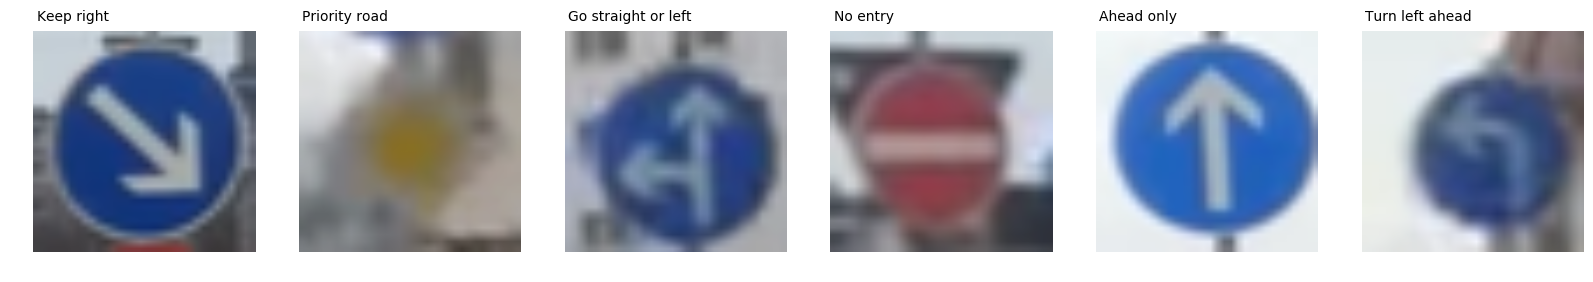

In [34]:
plot_images(X_extra_orig,y_extra, offset=1,rows=1,columns=6)

<center><b>Fig. 8 Examples of images of extra set A.</b></center>

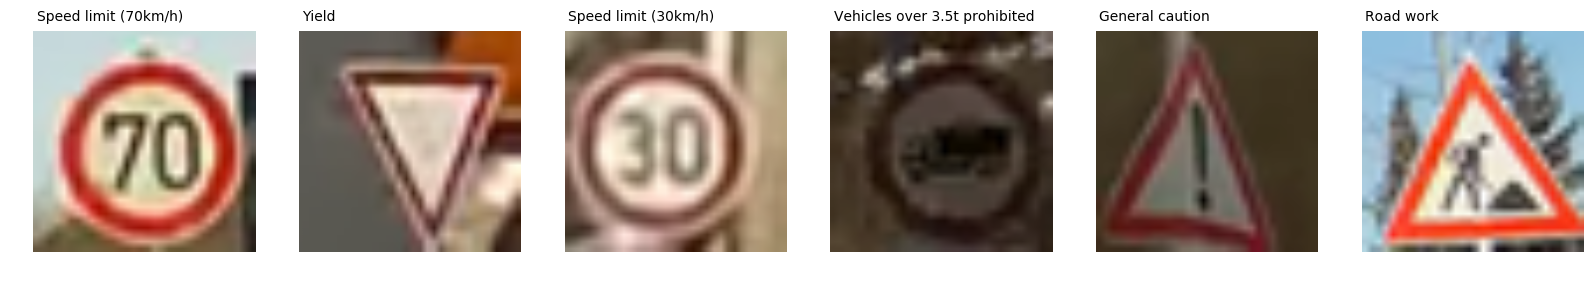

In [35]:
plot_images(X_extra_orig[48:],y_extra[48:], offset=1,rows=1,columns=6)

<center><b>Fig. 9 Examples of images of extra set B.</b></center>

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



#### Answer:

The images were cropped from two videos of drives through Germany. The first set of images is from the town of Dresden on an overclouded day [[3]](https://www.youtube.com/watch?v=3vmqrU9wXKg) and contains very common traffic signs (A). The second half is from a drive through a rural and hilly region on a sunny winter's day [[4]](https://www.youtube.com/watch?v=4zJTBXt8_a0) (B) and contains signs which are not so numerous in the training set. The second video was of significantly worse quality overall, including transcoding artifacts. The images where cropped to have a square aspect ratio and then resized to 32x32 pixels. Finally they were labeled by hand.

To my eye they appear to be of similar quality as the test data with some blurring introduced by the speed of driving. Some of the images are very blurred and blend into the white of the sky as seen above, others were captures with the sun behind them (see below). Thus, these images could be harder to classify.

In [40]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
softmax_op = tf.nn.softmax(logits)
top_k_op = tf.nn.top_k(softmax_op, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, save_path)
    extra_accuracy,_ = evaluate(X_extra, y_extra)
    extra_accuracy_a,_ = evaluate(X_extra[0:48], y_extra[0:48])
    extra_accuracy_b,_ = evaluate(X_extra[48:], y_extra[48:])
    feed_dict = {x: X_extra, y: y_extra}
    set_keep_factors_evaluation(feed_dict)
    ((top_values, top_indices), probabilities) = sess.run([top_k_op,softmax_op], feed_dict=feed_dict)
    print("Accuracy on the extra set A: {:.4f}".format(extra_accuracy_a))
    print("Accuracy on the extra set B: {:.4f}".format(extra_accuracy_b))
    print("Total Accuracy on the extra set: {:.4f}".format(extra_accuracy))

    predicted_classes = probabilities.argmax(axis=1)
    false_classified_indices = np.where(predicted_classes != y_extra)


Accuracy on the extra set A: 0.9792
Accuracy on the extra set B: 0.7692
Total Accuracy on the extra set: 0.8851


###### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


### Answer:
Overall the performance on the extra set is not quite as good as on the test set. For the extra set A the accuracy is 97.92%, which is comparable to the accuracy on the test set. For the images from extra set B which were cropped from a lower quality video with more challenging lighting and which contains rarer traffic signs, the accuracy is 76.92%. Overall the accuracy is 88.51%, which is still good but does not reach as human performance (>98%) [[5]](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf).


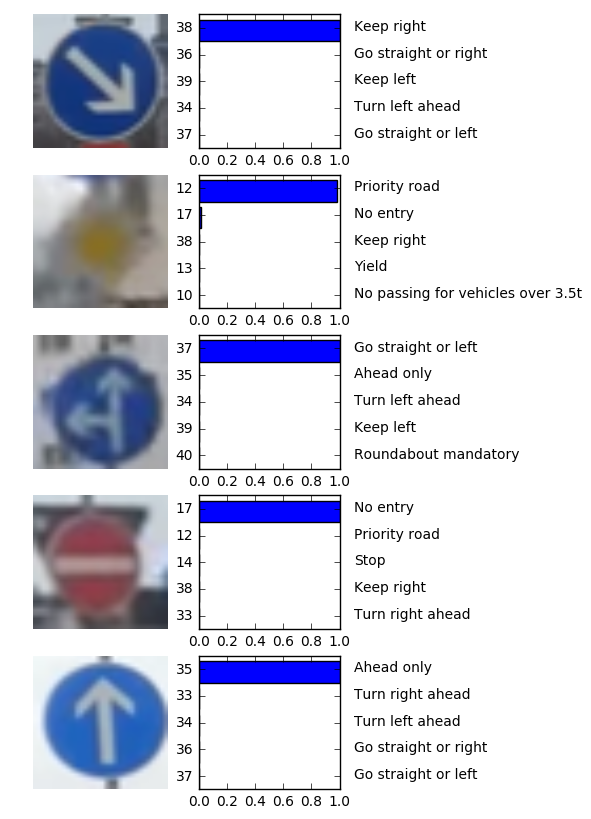

In [41]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

fig = plt.gcf()
fig.set_size_inches(20, 8)

def plot_probabilities(i, data, top_indices, top_values, num_cols=2):
    n = int(data.shape[0])
    num_rows = n
    row = i
    ax1 = plt.subplot2grid((num_rows,num_cols),(row, 0))
    ax2 = plt.subplot2grid((num_rows,num_cols),(row, 1))
    img = data[i,:,:,:]
    ax1.axis('off')
    ax1.imshow(img)
    ind = np.arange(5)
    ax2.barh(ind[::-1],top_values[i,:])
    ax2.set_autoscalex_on(False)
    ax2.set_xlim([0,1.000])
    ax2.set_yticks(ind + 0.5)
    ax2.set_yticklabels(map(lambda x: str(x), reversed(top_indices[i,:])))

    for j in range(5):
        index = top_indices[i,4-j]
        ax2.text(1.1, j + 0.4, signnames[index])
    

num_cols = 2
num_rows = 5
plt.figure(figsize=(4,2 * num_rows))

for i in range(5):
    plot_probabilities(i, X_extra_orig[0:5], top_indices[0:5], top_values[0:5])


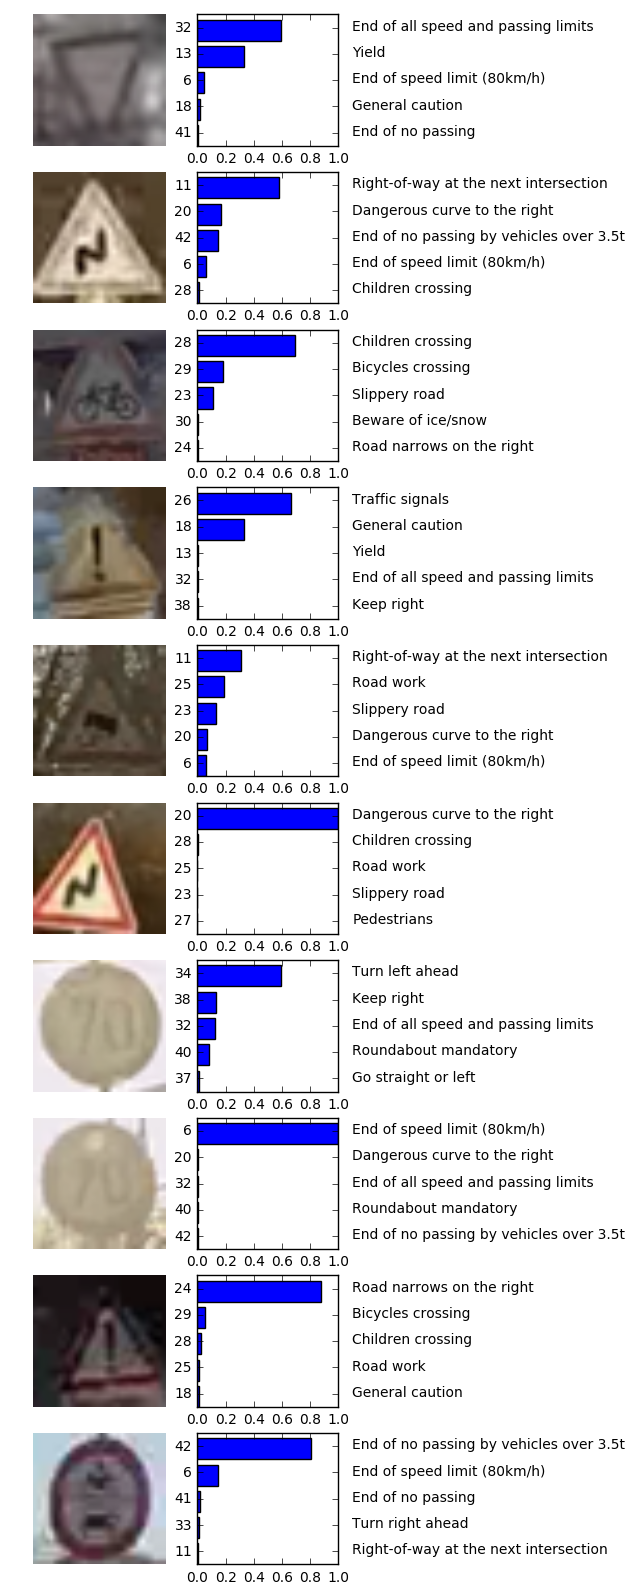

In [42]:
n = len(false_classified_indices[0])
num_cols = 2
num_rows = n
plt.figure(figsize=(4,2 * num_rows))

for i in range(len(false_classified_indices[0])):
    plot_probabilities(i, X_extra_orig[false_classified_indices], top_indices[false_classified_indices], top_values[false_classified_indices])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


#### Answer:
I have visualized two sets of traffic signs: The first set contains of the first five signs from the extra set A.
These signs are all classified correctly with very high confidence (the probability of the correct class is nearly 1.0 in all five cases). 

The second set of sings consists of all of the wrongly classified examples. For some of these, the right classification is among the top 5 scores ("yield", "bicycles crossing"). For the two "double curve" signs, at least "dangerous curve to the right" has the first and second highest score, respectively, which is not too far off the mark. The two "speed limit 70km/h" do not have the correct classification among the top 5. These images where taken against the sun and even exhibit some lens flare. Consequently, the contrast in these two images is very poor which might lead to the false classification. The last traffic sign is "motorcycles and cars prohibited" and was not part of the training set at all.

The poorer classification performance on these images can be explained by the lower quality of the video source (compression artifacts), the lighting conditions (backlight) and the a high percentage of rarer signs included which do not have many examples in the training set. Additionally, the "bicycle crossing" sign has an elaborate symbol of a bycicle in the center which was already hard to distinguish in many of the training examples. As there are many other waring signs with different symbols (e.g. "children crossing"), classifying this signs seems to be harder.

In order to improve the accuracy of the classifier, it would be helpful to collect more training examples, especially of the rarer signs. Additionally images from different lighting conditions (sunny, cloudy, night, day, backlight) and environmental conditions (clear, snow, rain) as well as partly occluded signs should be collected. Another approach would be to train an ensemble of classifiers whose inputs are preprocessed with different kinds of contrast enhancing algorithms [[6]](http://people.idsia.ch/~juergen/nn2012traffic.pdf), and averaging their predictions. In this way the widely differing lighting conditions encountered during classification could be mitigated.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.